In [1]:
import pandas as pd
import datetime


In [2]:
#import the price data for the specified range, Jan 1,2021 - Feb 28, 2021

price_df = pd.read_csv('blmn_close_prices.csv')

price_df['date'] = price_df['time']

del price_df['time']

price_df

,BLMN,date
0,18.340,2021-01-04 00:00:00-05:00
1,19.050,2021-01-05 00:00:00-05:00
2,20.310,2021-01-06 00:00:00-05:00
3,20.560,2021-01-07 00:00:00-05:00
4,20.675,2021-01-08 00:00:00-05:00
5,20.500,2021-01-11 00:00:00-05:00
6,20.960,2021-01-12 00:00:00-05:00
7,20.670,2021-01-13 00:00:00-05:00
8,21.180,2021-01-14 00:00:00-05:00
9,21.490,2021-01-15 00:00:00-05:00


In [3]:
weather_df = pd.read_csv('df_weather_data_updated-downloaded_copy.csv')
weather_df_sliced = weather_df.drop(columns=[
    'request.type', 
    'request.language', 
    'request.unit',
    'location.lat',
    'location.lon',
    'location.timezone_id',
    'location.utc_offset',
    ])

weather_df_sliced = weather_df_sliced.drop(weather_df_sliced.columns[[0,1]], axis=1)

weather_df_sliced.rename(columns={
    'location.region':'state', 
    'request.query': 'zipcode', 
    'location.name': 'city',
    'location.country':'country'
    }, inplace=True)

date = weather_df_sliced.pop('date')
weather_df_sliced.insert(0, 'date', date)

state = weather_df_sliced.pop('state')
weather_df_sliced.insert(1, 'state', state)

weather_df_sliced['date']= pd.to_datetime(weather_df_sliced['date']).dt.date
price_df['date'] = pd.to_datetime(price_df['date']).dt.date

weather_df_sliced

,date,state,zipcode,city,country,temperature,precip,humidity,visibility,pressure,...,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour
0,2021-01-01,Florida,34231,Sarasota,USA,23,0.0,82,10,1019,...,22,18,21,45,21,20,23,21,0.0,8.7
1,2021-01-01,Florida,34201,Bradenton,USA,24,0.0,79,10,1020,...,23,18,22,41,23,20,24,22,0.0,8.7
2,2021-01-01,Florida,33710,Saint Petersburg,USA,21,0.0,83,10,1019,...,21,17,20,51,20,20,21,21,0.0,8.7
3,2021-01-01,Florida,34994,Stuart,USA,26,0.0,75,10,1021,...,26,19,24,31,26,23,26,25,0.0,8.7
4,2021-01-01,Florida,32309,Tallahassee,USA,23,2.1,90,9,1018,...,21,18,20,27,20,18,23,21,0.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49203,2021-01-27,Florida,33322,Fort Lauderdale,USA,29,0.2,67,10,1018,...,27,19,26,16,27,22,29,26,0.0,10.9
49204,2021-01-28,Florida,33322,Fort Lauderdale,USA,22,0.0,60,10,1020,...,22,12,21,29,21,15,22,21,0.0,10.1
49205,2021-01-29,Florida,33322,Fort Lauderdale,USA,19,0.1,60,10,1024,...,18,10,18,27,18,17,19,18,0.0,7.0
49206,2021-01-30,Florida,33322,Fort Lauderdale,USA,20,0.1,60,10,1023,...,19,11,19,24,19,18,20,19,0.0,5.5


In [4]:

grouped_weather_df = weather_df_sliced.groupby(["state", 'date'], as_index=False).mean()

type(grouped_weather_df.loc[0][0])

str

In [5]:
florida_df = grouped_weather_df[grouped_weather_df['state'] == 'Florida']    

florida_df.head()

,state,date,zipcode,temperature,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour
354,Florida,2021-01-01,33402.033493,25.148325,1.898086,76.851675,9.784689,1019.956938,33.287081,24.062201,18.263158,22.736842,34.047847,23.837321,20.712919,25.148325,23.157895,0.0,7.985646
355,Florida,2021-01-02,33402.033493,24.569378,3.176555,79.947368,9.641148,1019.172249,49.722488,23.497608,18.531100,22.138756,29.052632,23.267943,20.339713,24.569378,22.588517,0.0,6.640191
356,Florida,2021-01-03,33402.033493,21.870813,1.005263,77.090909,9.401914,1017.425837,52.961722,20.918660,15.966507,20.129187,24.827751,20.641148,17.889952,21.870813,20.483254,0.0,5.852153
357,Florida,2021-01-04,33402.033493,18.531100,0.124402,60.258373,9.966507,1018.114833,28.937799,17.062201,8.641148,16.239234,17.559809,16.377990,14.363636,18.531100,16.593301,0.0,7.513397
358,Florida,2021-01-05,33402.033493,18.732057,0.000000,55.483254,10.000000,1018.382775,0.669856,15.473684,6.282297,15.071770,18.449761,15.071770,12.444976,18.732057,15.866029,0.0,8.700000


In [6]:

florida_merged_df = pd.merge(florida_df, price_df, how='outer', on='date').dropna()
del florida_merged_df['zipcode']
florida_merged_df.head()

,state,date,temperature,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour,BLMN
3,Florida,2021-01-04,18.531100,0.124402,60.258373,9.966507,1018.114833,28.937799,17.062201,8.641148,16.239234,17.559809,16.377990,14.363636,18.531100,16.593301,0.0,7.513397,18.340
4,Florida,2021-01-05,18.732057,0.000000,55.483254,10.000000,1018.382775,0.669856,15.473684,6.282297,15.071770,18.449761,15.071770,12.444976,18.732057,15.866029,0.0,8.700000,19.050
5,Florida,2021-01-06,18.557971,0.002899,57.804348,10.000000,1019.275362,14.449275,14.971014,6.391304,14.224638,17.847826,14.224638,11.804348,18.557971,15.253623,0.0,8.560870,20.310
6,Florida,2021-01-07,20.796748,1.148780,63.804878,9.943089,1016.934959,58.373984,18.113821,10.495935,17.219512,23.186992,17.219512,14.715447,20.796748,18.284553,0.0,5.806504,20.560
7,Florida,2021-01-08,19.130081,0.996748,72.252033,9.853659,1013.829268,64.731707,18.146341,12.601626,17.382114,31.601626,17.544715,15.056911,19.130081,18.016260,0.0,5.278862,20.675


In [28]:
florida_merged_df.corr()["BLMN"].sort_values()

visibility    -0.018886
windgust       0.018026
pressure       0.067644
cloudcover     0.105170
humidity       0.230261
dewpoint       0.344773
mintemp        0.366872
sunhour        0.397039
windchill      0.400161
feelslike      0.412371
heatindex      0.428957
avgtemp        0.430672
temperature    0.479731
maxtemp        0.479731
precip         0.498766
BLMN           1.000000
totalsnow           NaN
Name: BLMN, dtype: float64

<AxesSubplot:xlabel='temperature', ylabel='BLMN'>

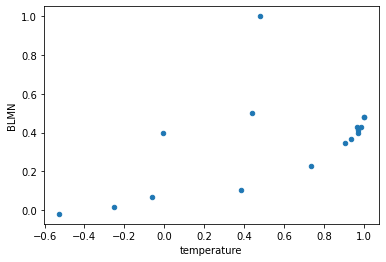

In [23]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "temperature")

<AxesSubplot:xlabel='precip', ylabel='BLMN'>

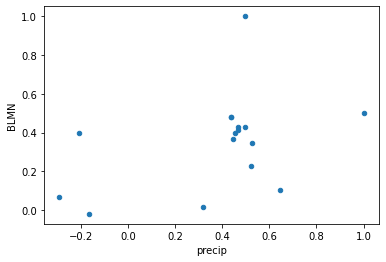

In [24]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "precip")

<AxesSubplot:xlabel='heatindex', ylabel='BLMN'>

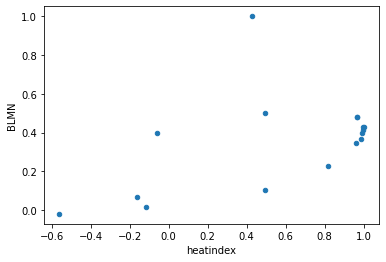

In [25]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "heatindex")